In [1]:
from lib.fixed_income.rates.treasury_rates import TreasuryRates
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
tr = TreasuryRates()

In [3]:
tr.get().tail()

,date,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
153,2022-08-12,2.23,2.50,2.63,3.13,3.26,3.25,3.18,2.97,2.92,2.84,3.34,3.12
154,2022-08-15,2.27,2.53,2.72,3.13,3.23,3.20,3.14,2.91,2.86,2.79,3.31,3.10
155,2022-08-16,2.26,2.51,2.70,3.12,3.26,3.25,3.19,2.95,2.90,2.82,3.31,3.11
156,2022-08-17,2.22,2.51,2.68,3.15,3.27,3.28,3.27,3.04,2.99,2.89,3.37,3.15
157,2022-08-18,2.23,2.56,2.71,3.12,3.24,3.22,3.23,3.02,2.97,2.88,3.35,3.14


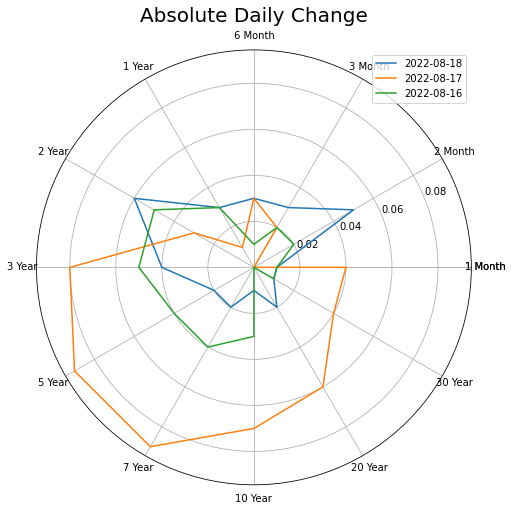

In [4]:
df = tr.change_distribution()

categories = df.columns[1:]
categories = [*categories, categories[0]]

a, b, c = df.iloc[-1, 1:].abs(), df.iloc[-2, 1:].abs(), df.iloc[-3, 1:].abs()
a = [*a, a[0]]
b = [*b, b[0]]
c = [*c, c[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(a))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, a, label=df['date'].iloc[-1].date())
plt.plot(label_loc, b, label=df['date'].iloc[-2].date())
plt.plot(label_loc, c, label=df['date'].iloc[-3].date())
plt.title('Absolute Daily Change', size=20, y=1.05)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

In [5]:
tr.change_distribution()

,date,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
0,2022-08-15,0.04,0.03,0.09,0.00,-0.03,-0.05,-0.04,-0.06,-0.06,-0.05,-0.03,-0.02
1,2022-08-16,-0.01,-0.02,-0.02,-0.01,0.03,0.05,0.05,0.04,0.04,0.03,0.00,0.01
2,2022-08-17,-0.04,0.00,-0.02,0.03,0.01,0.03,0.08,0.09,0.09,0.07,0.06,0.04
3,2022-08-18,0.01,0.05,0.03,-0.03,-0.03,-0.06,-0.04,-0.02,-0.02,-0.01,-0.02,-0.01


In [6]:
tr.periodic_nominal_changes()

,Change Since,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
0,2022-08-12,0.00,0.06,0.08,-0.01,-0.02,-0.03,0.05,0.05,0.05,0.04,0.01,0.02
0,2022-08-05,0.02,0.17,0.13,0.02,-0.05,-0.02,0.05,0.05,0.06,0.05,0.08,0.08
0,2022-07-08,0.66,0.64,0.73,0.44,0.28,0.10,0.09,-0.11,-0.19,-0.21,-0.18,-0.13


<AxesSubplot:>

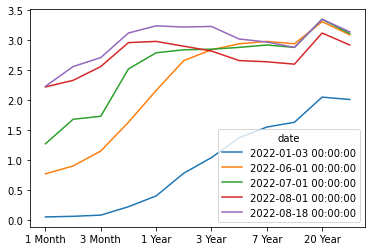

In [7]:
tr.point_in_time_curves().plot()

<AxesSubplot:xlabel='date'>

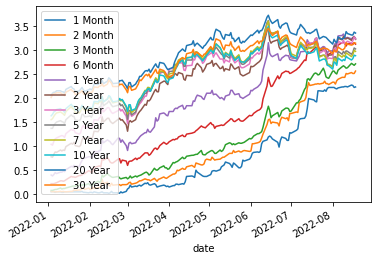

In [8]:
tr.df.set_index('date').plot()

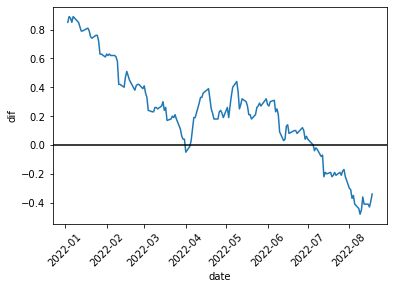

In [12]:
raw = tr.get()
spread = raw[['date','10 Year', '2 Year']]
spread['dif'] = spread['10 Year'] - spread['2 Year']
g = sns.lineplot(data=spread, x = 'date', y = 'dif')
plt.xticks(rotation=45)
plt.axhline(0, c='black')